In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Próxima linha necessária apenas no jupyternotebook ou google colab
%matplotlib inline

base = pd.read_csv('census.csv')
print(f'base["income"].unique() -> {base["income"].unique()}')
print(f'base.shape -> {base.shape}')
print(f'base.columns \n{base.columns}', end='\n'*2)

base.head()

base["income"].unique() -> [' <=50K' ' >50K']
base.shape -> (32561, 15)
base.columns 
Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')



,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



> # **Aula 014** - Regressão logística  com Sklearn - **Tensorflow: Classificação**




In [0]:
# -- exemplo: prever com base no atributos de uma pessoa qual será seu salário <=50K ou >50K --

pessoa_attrs = base.iloc[:, 0:14].values
classes = base.iloc[:, 14].values

In [77]:
print(f'type(pessoa_attrs) - {type(pessoa_attrs)}')
pessoa_attrs

type(pessoa_attrs) - <class 'numpy.ndarray'>


array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [78]:
print(f'type(classes) - {type(classes)}')
classes

type(classes) - <class 'numpy.ndarray'>


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [79]:
pessoa_attrs[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [80]:
# normalizando os dados (transformando strings em números)

label_encoder = LabelEncoder()

pessoa_attrs[:, 1] = label_encoder.fit_transform(pessoa_attrs[:, 1])
pessoa_attrs[:, 3] = label_encoder.fit_transform(pessoa_attrs[:, 3])
pessoa_attrs[:, 5] = label_encoder.fit_transform(pessoa_attrs[:, 5])
pessoa_attrs[:, 6] = label_encoder.fit_transform(pessoa_attrs[:, 6])
pessoa_attrs[:, 7] = label_encoder.fit_transform(pessoa_attrs[:, 7])
pessoa_attrs[:, 8] = label_encoder.fit_transform(pessoa_attrs[:, 8])
pessoa_attrs[:, 9] = label_encoder.fit_transform(pessoa_attrs[:, 9])
pessoa_attrs[:, 13] = label_encoder.fit_transform(pessoa_attrs[:, 13])

pessoa_attrs[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [81]:
# escalonando os dados

scaler_pessoa_attrs = StandardScaler()
pessoa_attrs = scaler_pessoa_attrs.fit_transform(pessoa_attrs)

# divisao de base de treinamento e base de teste

pessoa_attrs_treinamento, pessoa_attrs_teste, classes_treinamento, classes_teste = train_test_split(pessoa_attrs, classes, test_size = 0.3)

# max_iter = quantidade maxima de iterações
classificador = LogisticRegression(max_iter = 10000)
classificador.fit(pessoa_attrs_treinamento, classes_treinamento)

previsoes = classificador.predict(pessoa_attrs_teste)

# comparando as previsoes com os testes
taxa_acerto = accuracy_score(classes_teste, previsoes)
print(f'taxa de acerto - {taxa_acerto}')

taxa de acerto - 0.8246494011669567



> # **Aula 015** - Regressão logística com Estimators (Tensorflow) - **Tensorflow: Classificação**




In [82]:
# -- exemplo: prever com base no atributos de uma pessoa qual será seu salário <=50K ou >50K --

def converte_classe(rotulo):
  if rotulo == ' >50K':
    return 1
  else:
    return 0
  
# convertendo as classes para números
base['income'] = base['income'].apply(converte_classe)

pessoa_attrs = base.drop('income', axis = 1)
classes = base['income']

print(f'type(pessoa_attrs) - {type(pessoa_attrs)}')
print(f'type(classes) - {type(classes)}')

type(pessoa_attrs) - <class 'pandas.core.frame.DataFrame'>
type(classes) - <class 'pandas.core.series.Series'>


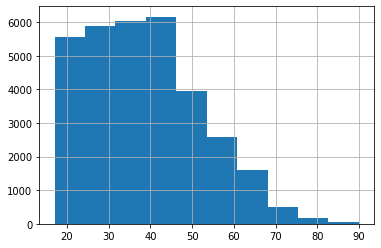

In [83]:
# Faixa de idade das pessoas
base.age.hist()

In [85]:
idade = tf.feature_column.numeric_column('age')

# Separando a faixa de idades com base no gráfico anterior
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries = [20,30,40,50,60,70,80,90])]
idade_categorica

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]

In [86]:
pessoa_attrs.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [90]:
pessoa_attrs['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [91]:
pessoa_attrs['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [93]:
# separando atributos categóricos (tem uma categoria)

nome_colunas_categoricas = ['education', 'marital-status', 'occupation', 'relationship',
                            'race', 'sex', 'native-country']

colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, 
                                                                                 vocabulary_list = pessoa_attrs[c].unique()) 
                                                                                 for c in nome_colunas_categoricas]

colunas_categoricas

[VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn

In [98]:
nome_colunas_numericas = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

colunas_numericas = [tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas]
colunas_numericas

[NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital-gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital-loos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='hour-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [100]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas
colunas

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90)),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-ins

In [105]:
pessoa_attrs_treinamento, pessoa_attrs_teste, classes_treinamento, classes_teste = train_test_split(pessoa_attrs, classes, test_size = 0.3)

funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = pessoa_attrs_treinamento, y = classes_treinamento,
                                                         batch_size = 32, num_epochs = None, shuffle = True)

classificador = tf.estimator.LinearClassifier(feature_columns = colunas)

classificador.train(input_fn = funcao_treinamento, steps = 10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdoawqqu0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0a76a94c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Vari

In [112]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = pessoa_attrs_teste, batch_size = 32, shuffle = False)

previsoes = classificador.predict(input_fn = funcao_previsao)

previsoes_final = []
for p in previsoes:
  previsoes_final.append(p['class_ids'])

taxa_acerto = accuracy_score(classes_teste, previsoes_final)
print(f'taxa de acerto - {taxa_acerto}')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdoawqqu0/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
taxa de acerto - 0.795577848295629
